<a href="https://colab.research.google.com/github/crislanecas/python/blob/main/Alura%26WoMakersCode/16_An%C3%A1lise_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [2]:
# Importa as bibliotecas.
import pandas as pd
import seaborn as sns

In [3]:
# Importa parte da biblioteca Scipy.
from scipy.stats import ranksums

# Importação dos dados

In [4]:
# Importa parte da biblioteca do Google Colab para te acesso ao Google Drive, utilizando o método drive.mount().
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Cria um dataframe para receber os dados do arquivo CSV.
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Estatística - Alura/tips.csv')

In [6]:
# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas.# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas.
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# Tradução das colunas e campos


In [7]:
# Mostra o index() com os nomes das colunas do dataframe.
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [8]:
# Cria um dicionário com os nomes das colunas, informando de forma correspondente os novos nomes para cada coluna.
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [9]:
# Renomeia as colunas conforme dicionário criado acima e atribui a uma nova variável o dataframe.
# O parâmetro inplace modifica o dataframe original, não sendo necessárioem vez de retornar um novo.
dados.rename(columns = renomear, inplace = True)

In [10]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado entre parenteses.
dados.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [11]:
# Renomeia as colunas conforme dicionário criado acima e atribui a uma nova variável o dataframe.
gorjetas = dados.rename(columns = renomear)

In [12]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado.
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [13]:
# Mostra todos os valores únicos da coluna/variável sobremesa.
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# Cria um dicionário com os campos, informando de forma correspondente os novos nomes para cada campo.
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [15]:
# Mapea todos campos da coluna/variável sobremesa, tendo como parâmetro a dicionário sim_nao.
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [16]:
# Atribui o mapa para a coluna/variável sobremesa.
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [17]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado.
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [18]:
# Mostra todos os valores únicos da coluna/variável dias da semana.
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [19]:
# Cria um dicionário com os campos, informando de forma correspondente os novos nomes para cada campo do dia da semana.
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [20]:
# Mapea todos campos da coluna/variável dia da semana, tendo como parâmetro o dicionário dias.
# Atribui o mapa para a coluna/variável dias da semana.
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [21]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado.
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [22]:
# Mostra novamente todos os valores únicos da coluna/variável dias da semana, agora com as novas atribuições dos campos.
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [23]:
# Mostra todos os valores únicos da coluna/variável hora do dia.
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [24]:
# Cria um dicionário com os campos, informando de forma correspondente os novos nomes para cada campo da hora do dia.
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [25]:
# Mapea todos campos da coluna/variável hora do dia, tendo como parâmetro o dicionário hora.
# Atribui o mapa para a coluna/variável hora do dia.
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [26]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado.
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Análise 1: valor da conta e gorjeta


## Análise gráfica

<Axes: xlabel='valor_da_conta', ylabel='gorjeta'>

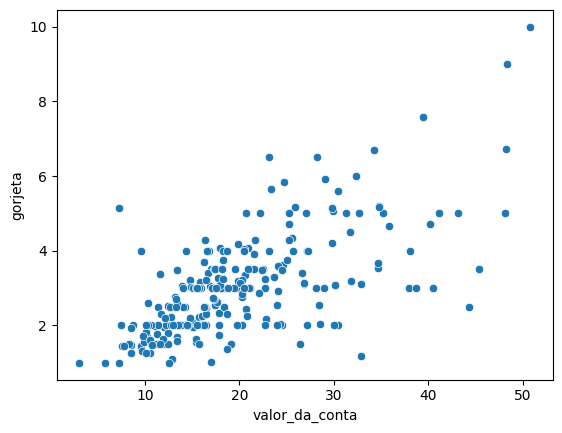

In [27]:
# Cria um gráfico de dispersão.
sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta.

In [28]:
# Mostra a quantidade de linhas e colunas do dataframe.
gorjetas.shape

(244, 6)

In [29]:
# Formata uma frase para exibir o número de linhas/registros.
print('A base de dados contém {} registros'.format(gorjetas.shape[0]))

A base de dados contém 244 registros


In [30]:
# Formata uma frase para exibir o número de linhas/registros.
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
# Exibe um frase para mostrar do que se trata os dados abaixo.
print('Registros não nulos')
# Conta os registros de todas as colunas do dataframe para verificar que não há dados nulos.
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

In [31]:
# Adiciona uma nova coluna ao dataframe com o calculo do percentual de gorgetas.
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [32]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587


In [33]:
# Arredonda os valores de percentual para duas casas.
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.porcentagem

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
239    0.20
240    0.07
241    0.09
242    0.10
243    0.16
Name: porcentagem, Length: 244, dtype: float64

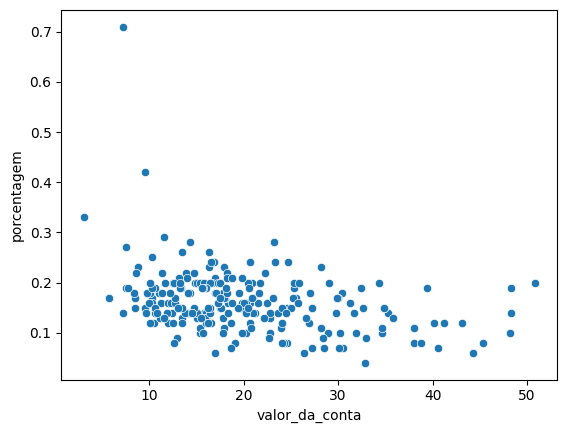

In [34]:
# Cria uma gráfico de dispersão.
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

## Conclusão

Visualmente parece que o valor da conta não é proporcional ao valor da gorjeta, ao aumentar o valor da conta as gorjetas aumental, mas não são proporcionais.

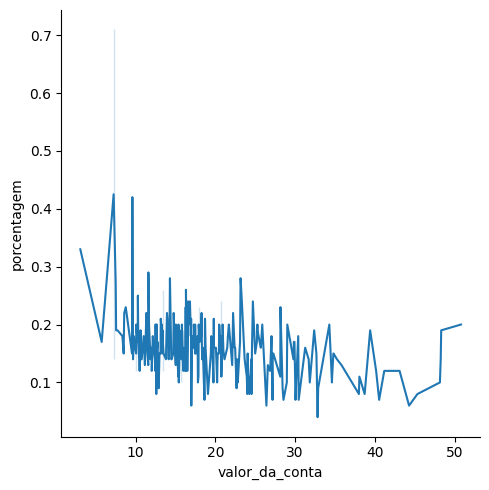

In [35]:
# Cria um gráfico de linha.
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind = 'line', data=gorjetas)

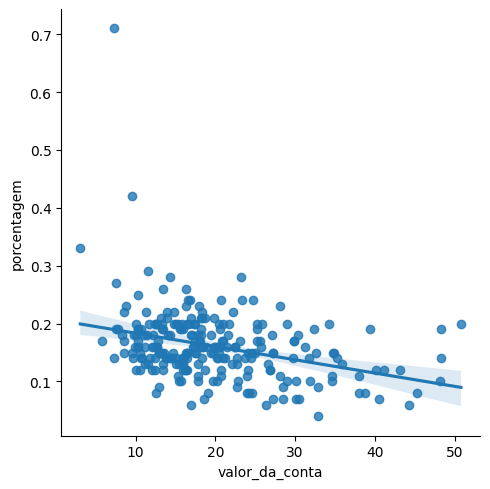

In [36]:
# Cria uma gráfico de dispersão com uma linha de tendência.
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

[Text(0.5, 0, 'Valor da conta'), Text(0, 0.5, 'Valor da gorjeta')]

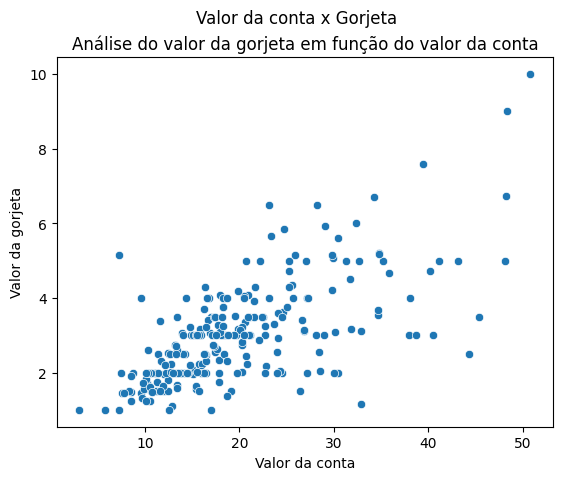

In [37]:
# Cria uma gráfico de dispersão pernsonalizado.
grafico = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
grafico.figure.suptitle('Valor da conta x Gorjeta') # Insere um título no gráfico.
grafico.set_title('Análise do valor da gorjeta em função do valor da conta') # Insere um subtítulo.
grafico.set(xlabel='Valor da conta', ylabel='Valor da gorjeta') # Personaliza as labels para eixos x e y, respectivamente.

In [38]:
# Cria uma imagem com o gráfico no formato png.
imagem = grafico.get_figure()

In [39]:
# Salva a imagem usando savefig().
imagem.savefig('imagem.png')

# Análise 2: sobremesa

## Análise grafica

In [40]:
# Mostra apenas os registros em que sobremesa é igual a 'Sim', portanto que pediram sobremesa.
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [41]:
# Mostra uma tabela descritiva com os dados estatísticos dos registros onde a variável sobremesa é igual a 'Sim'.
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [42]:
# Mostra uma tabela descritiva com os dados estatísticos dos registros onde a variável sobremesa é igual a 'Não'.
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


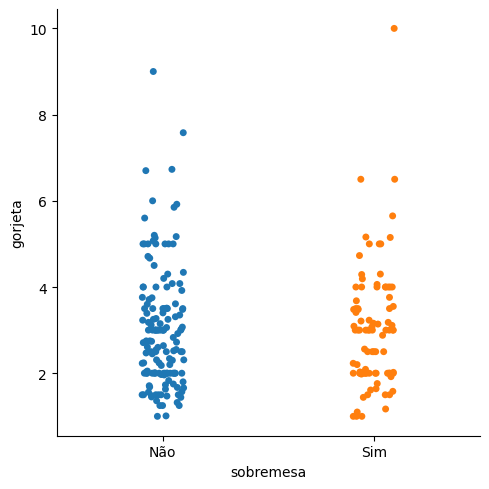

In [43]:
# Cria uma gráfico categórico, com as variáveis sobremesa e gorjeta.
sns.catplot(x='sobremesa', y='gorjeta', hue='sobremesa', data=gorjetas)

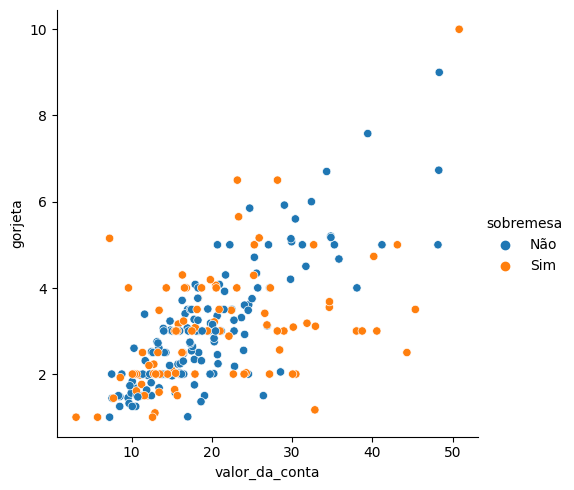

In [44]:
# Cria uma gráfico de dispersão, relacionando valor da conta com a gorjeta, mas diferencia a tonalidade por sobremesa, sim ou não.
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

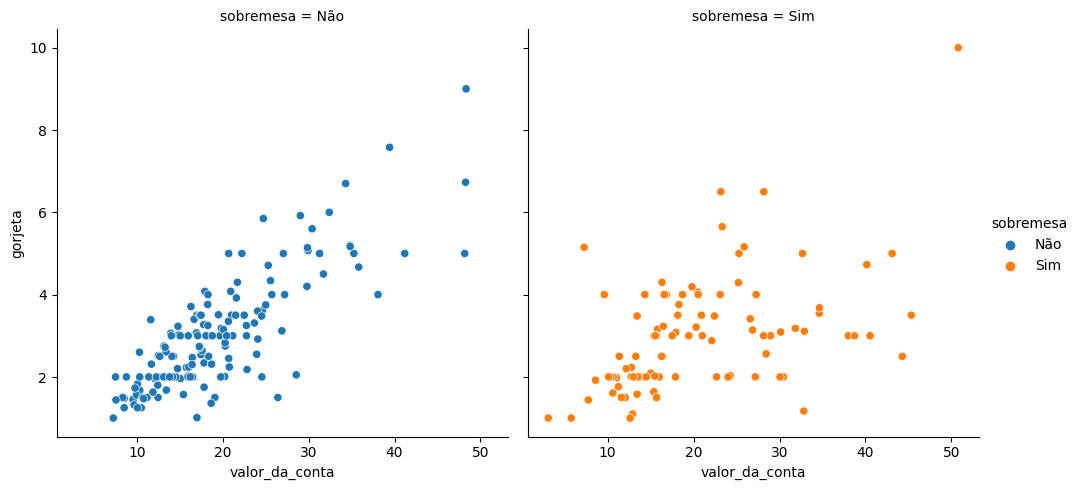

In [45]:
# Cria um gráfico de dispersão, relacionando valor da conta com a gorjeta, mas separado em dois gráficos pela variáveis sobremesa.
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

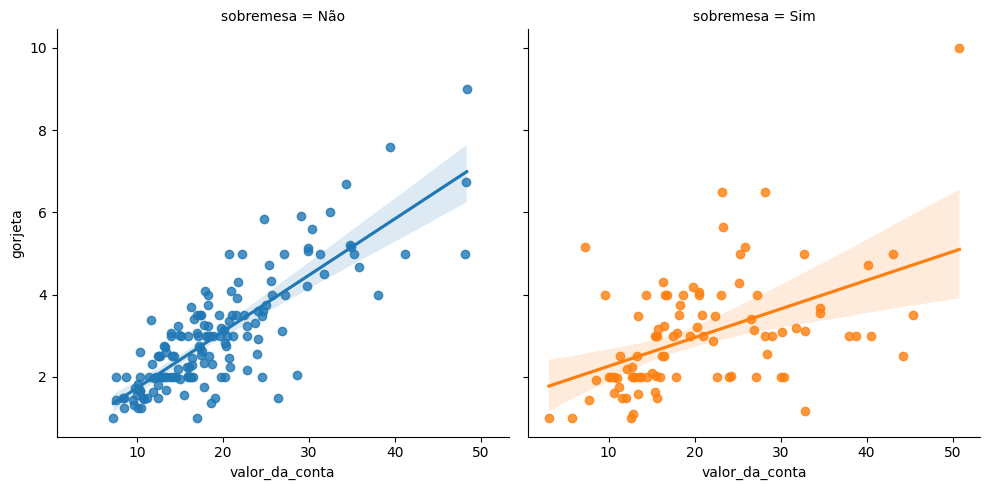

In [46]:
# Cria uma gráfico de dispersão, relacionando valor da conta com a gorjeta, com uma reta de regressão.
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

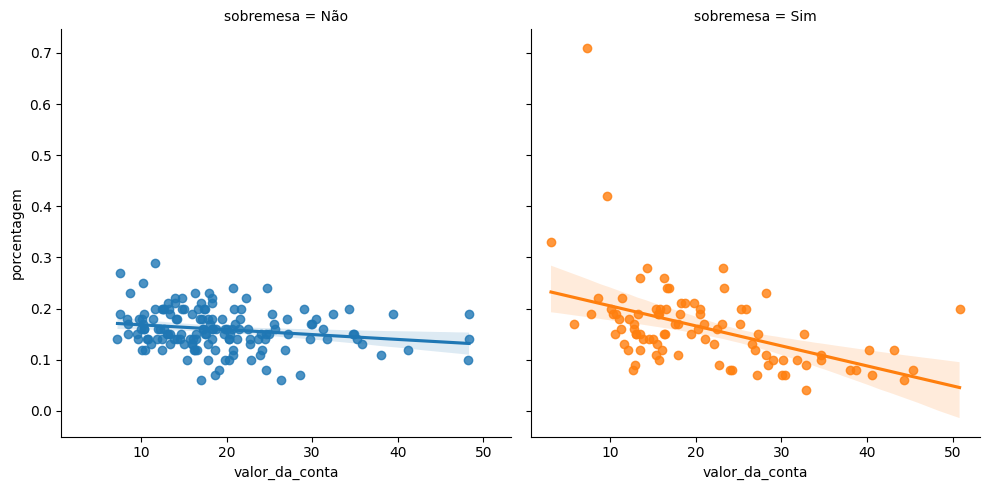

In [47]:
# Cria uma gráfico de dispersão, relacionando valor da conta com o percentual, com uma linha de tendência.
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

## Conclusão

Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram a sobremesa e os que não pediram.


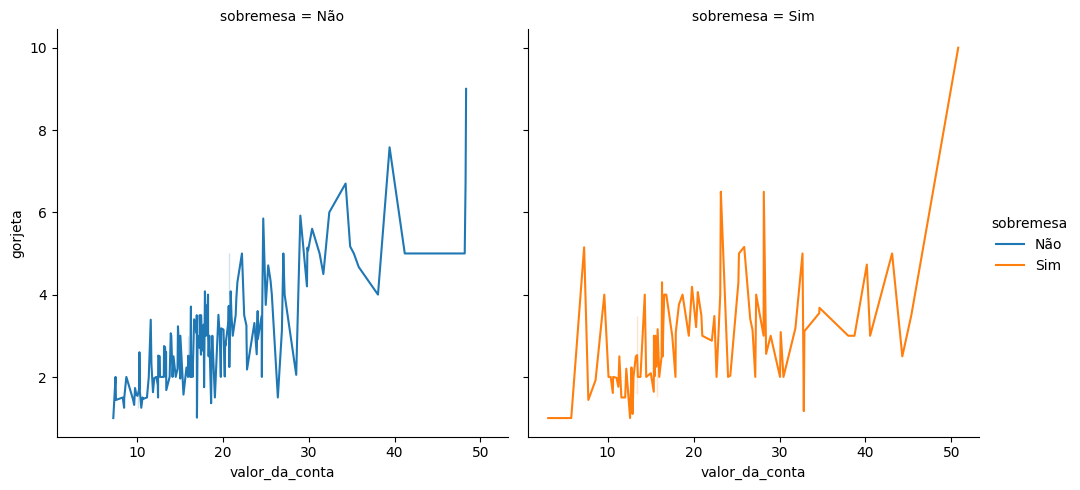

In [48]:
# Cria um gráfico de linha, relacionando valor da conta com a gorjeta, separado. mas separado em dois gráficos pela variáveis sobremesa.
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

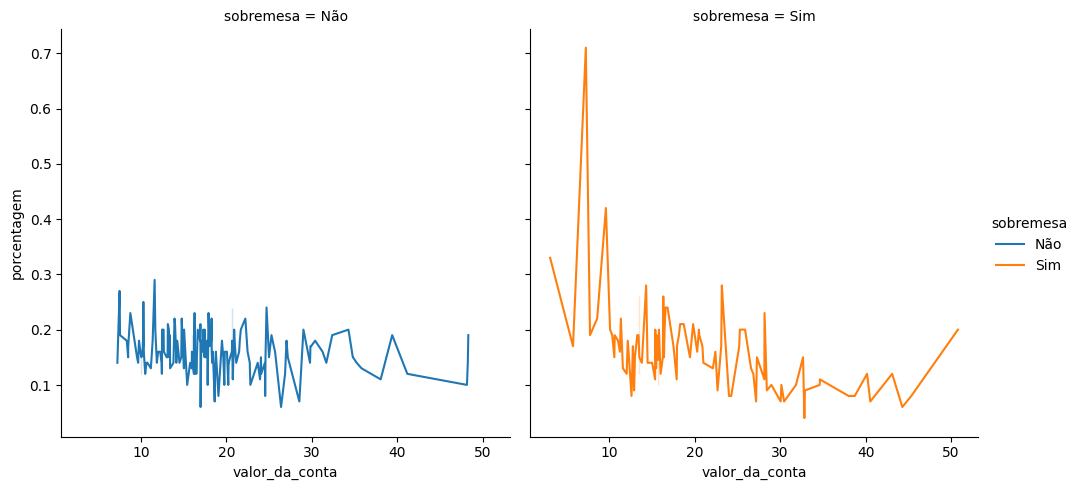

In [49]:
# Cria um gráfico de linha, relacionando valor da conta com o perncentual, mas separado em dois gráficos pela variáveis sobremesa.
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

## Teste de hipótese

**H<sup>null</sup>** ou **H<sup>0</sup>**=
A distribuição da gorjeta é igual nos dois grupos.

**H<sup>alt</sup>** ou **H<sup>1</sup>**=
A distribuição da gorjeta é não é igual nos dois grupos.

In [50]:
# Faz um retorne no dataset com apenas os registros que pediram sobremesa.
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [51]:
# Faz um retorne no dataset com apenas os registros que não pediram sobremesa.
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [52]:
# Calcula a estatística de teste e p-valor, para verificar se os dois grupos são iguais ou diferentes.
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [53]:
# Formata uma frase para selecionar e exibir o apenas o p-valor.
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


## Conclusão

Apesar de os dois grupos terem dado gorjetas de valores diferentes entre si, a diferença é insignificante do ponto de vista matemático.

Para aceitarmos a hipótese alternativa, o valor de pvalue deveria ser igual ou menor do que 0.05. Como nosso resultado foi maior do que isso, poderemos descartar esta hipótese.

Portanto, a distribuição da gorjeta é igual nos dois grupos.

# Análise 3: dia da semana

## Análise gráfica

In [54]:
# Mostra todos os valores únicos da coluna/variável dias da semana.
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

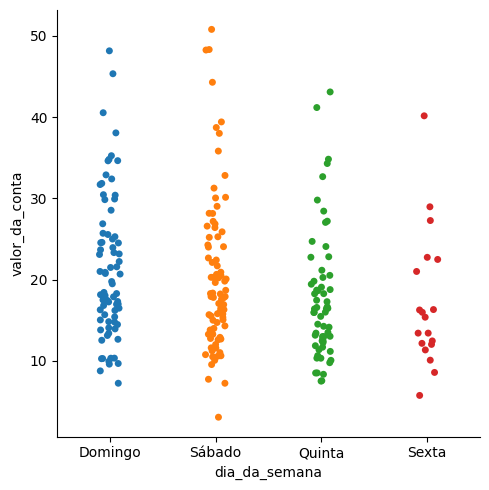

In [55]:
# Criar um de gráficos de categórias, relacionando o valor da conta com os dias da semana.
sns.catplot(x='dia_da_semana', y='valor_da_conta', hue='dia_da_semana', data=gorjetas)

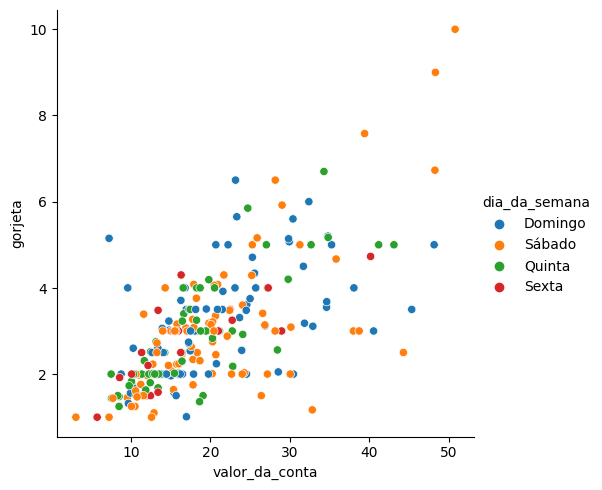

In [56]:
# Cria uma gráfico de dispersão, relacionando valor da conta com a gorjeta e diferenciando a tonalidade por pelos dias da semana.
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

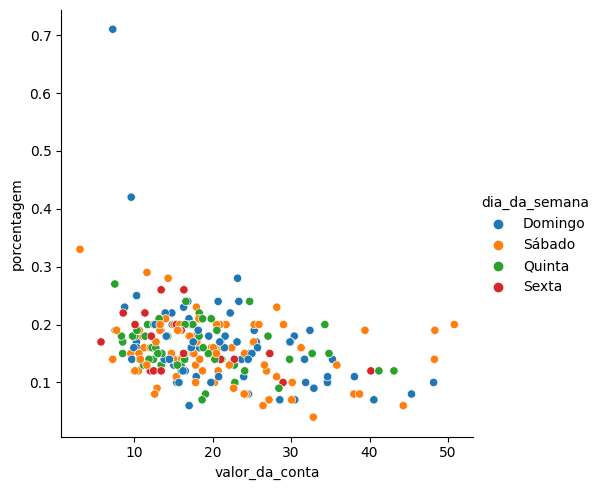

In [57]:
# Cria uma gráfico de dispersão, relacionando valor da conta com a percentual da gorjeta e diferenciando a tonalidade por pelos dias da semana.
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

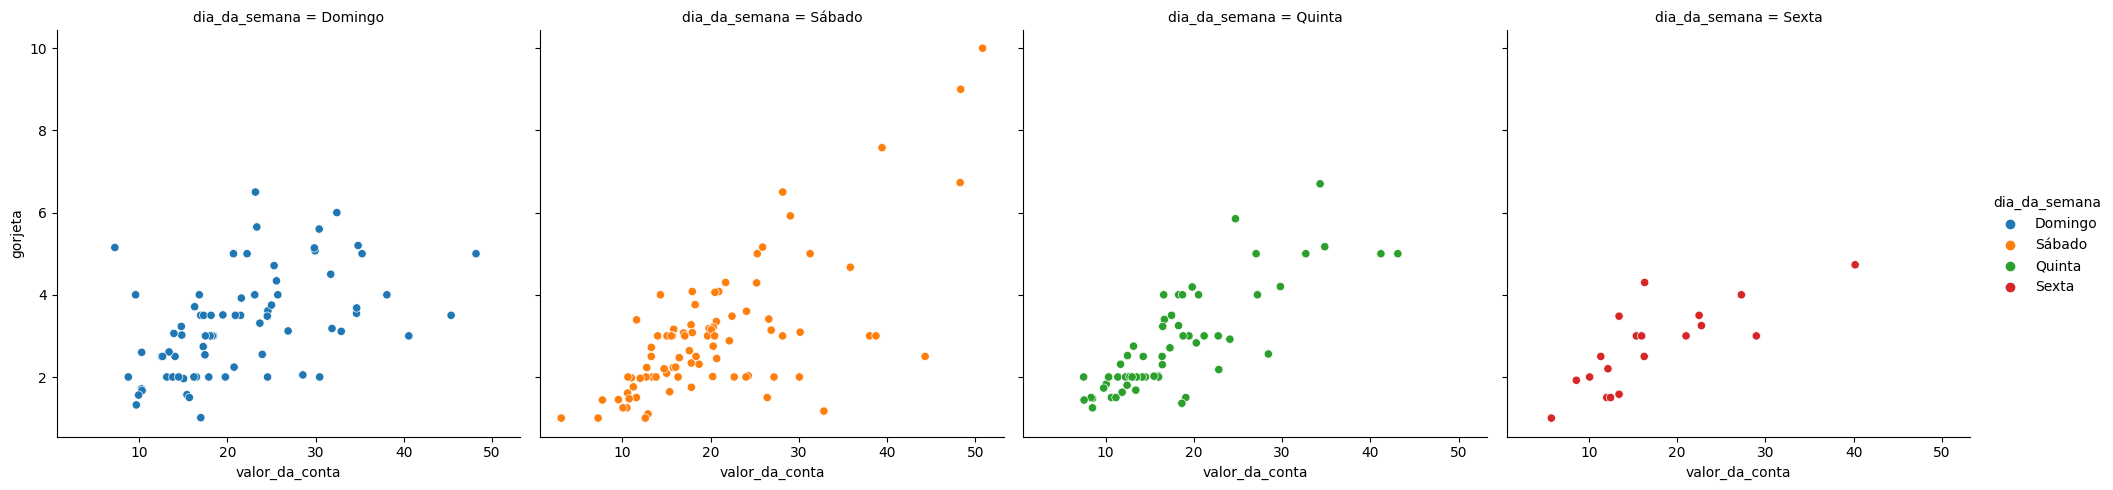

In [58]:
# Cria uma gráfico de dispersão, relacionando o valor da conta com a gorjeta, diferenciando a cor e coluna pelo dia da semana.
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

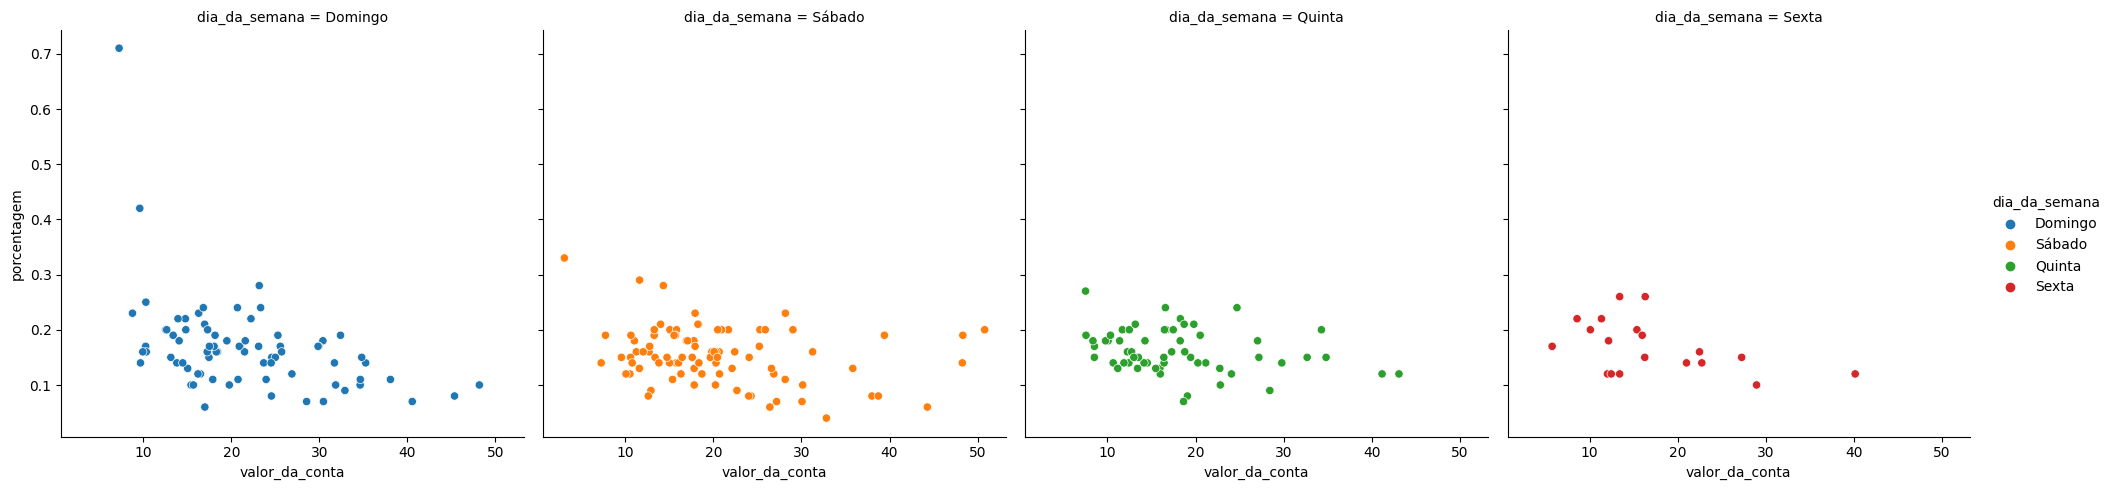

In [59]:
# Cria uma gráfico de dispersão, relacionando o valor da conta com o percentual de gorjeta, diferenciando a cor e coluna pelo dia da semana.
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

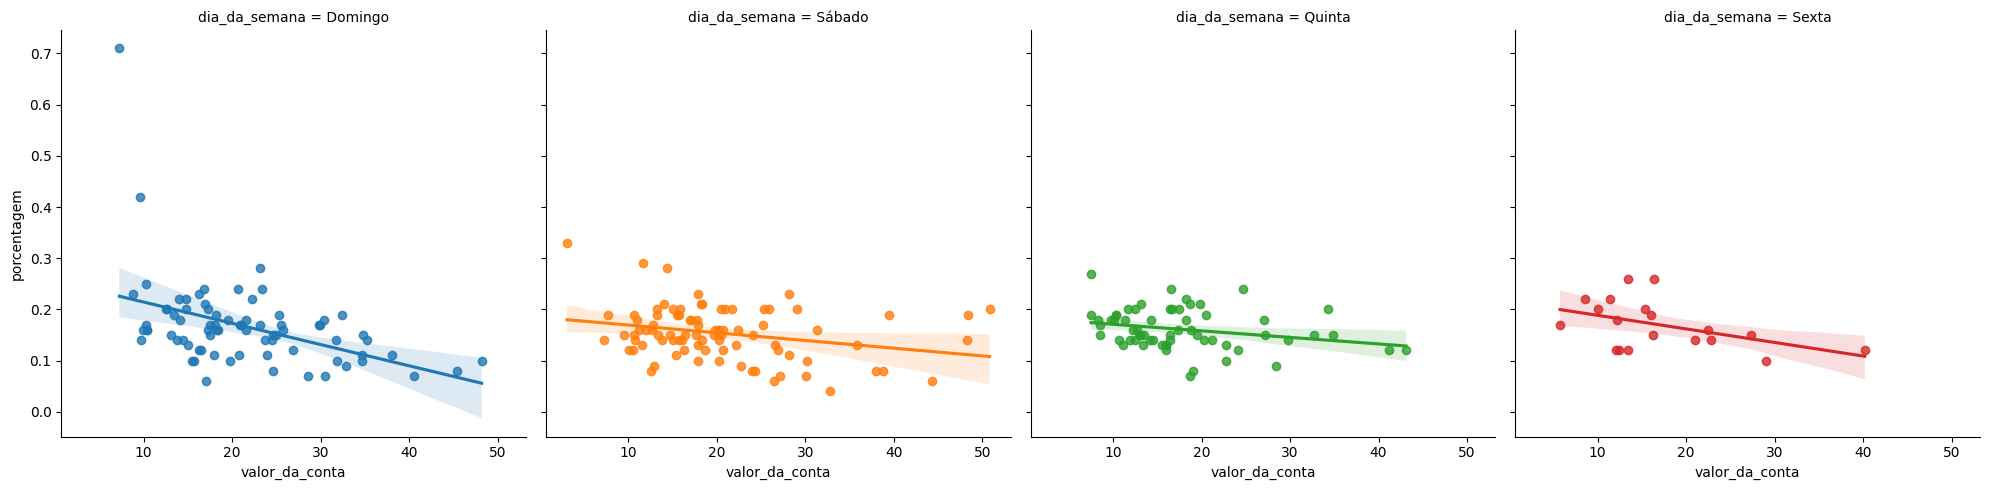

In [60]:
# Cria uma gráfico de dispersão, relacionando o valor da conta com o percentual de gorjeta, diferenciando a cor e coluna pelo dia da semana e incluindo uma linha de tendência.
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

## Conclusão

Visualmente o sábado parece ser o dia da semana com maior relação com o valor da gorjeta, porém as linhas de tendência com o percentual do valor mostram uma relação negativa semelhante para todos os dias da semana.

## Análise descritiva

In [61]:
# Calcula a média geral dos valores das gorgetas.
media_geral_gorjetas = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [62]:
# Calcula a média das variáveis/colunas, por dia da semana.
gorjetas.groupby(['dia_da_semana']).mean()

<ipython-input-62-926e570874ce>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [63]:
# Calcula a média das variáveis/colunas, por dia da semana, mas especificando as colunas a ser consideradas.
# Exclui a média de pessoas, pois como não existem 2,84 pessoas, não faz sentido exibir esse tipo de dado.
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

<ipython-input-63-8e33b569c55f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [64]:
print('Frequência dos dias') # Exibe um frase para mostrar do que se trata os dados abaixo.
# Calcula com que frequência cada dia da semana apareceu na coluna dias da semana.
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>** ou **H<sup>0</sup>**=
A distribuição do valor da conta é igual no sábado e no domingo.

**H<sup>alt</sup>** ou **H<sup>1</sup>**=
A distribuição do valor da conta não é igual no sábado e no domingo.

In [65]:
# Faz um retorne no dataset com apenas os registros em que o dia da semana é domingo.
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [66]:
# Faz um retorne no dataset com apenas os registros em que o dia da semana é sábado.
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [67]:
# Calcula a estatística de teste e p-valor, para verificar se os dois grupos são iguais ou diferentes.
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [68]:
# Formata uma frase para selecionar e exibir o apenas o p-valor.
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
# print('O valor do p-value é {}'.format(r2.pvalue))
print(f'O valor do p-value é: {r2.pvalue}')

O valor do p-value é: 0.3576728477868443


## Conclusão

Para aceitaremos a hipótese alternativa o p-valor teria que ser menor do que 0.05, como é maior, apenas nossa hipótese nula é válida. Isso significa que a distribuição do valor da conta é igual no sábado e no domingo.

Apesar do sábado ser mais frequente e o domingo possuir a maior média de gorjetas, não são diferentes no que diz respeito ao valor da conta, a diferença é insignificante do ponto de vista matemático.

Portanto, a distribuição do valor da conta é igual no sábado e no domingo.

# Análise 4: hora do dia

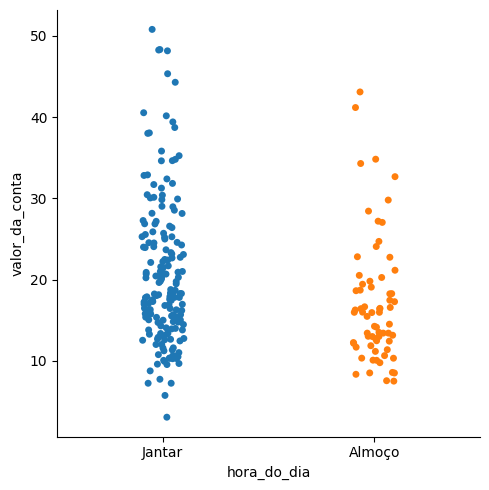

In [72]:
# Criar um de gráficos de categórias, relacionando o valor da conta com a hora do dia.
sns.catplot(x='hora_do_dia', y='valor_da_conta', hue='hora_do_dia', data=gorjetas)

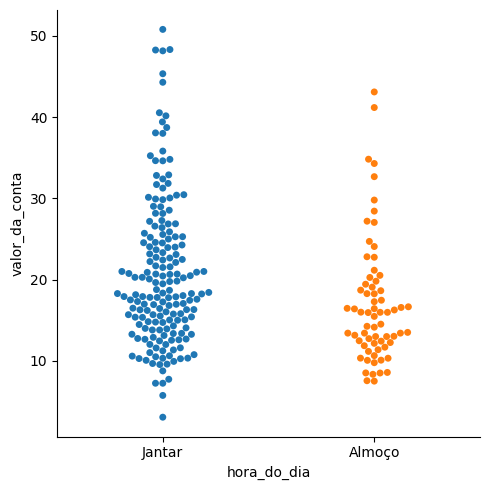

In [74]:
# Criar um de gráficos de categórias, relacionando o valor da conta com a hora do dia.
# O parâmetro kind='swarm', ajuda visualizar todos os pontos separadamente.
sns.catplot(x='hora_do_dia', y='valor_da_conta', hue='hora_do_dia', kind='swarm', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

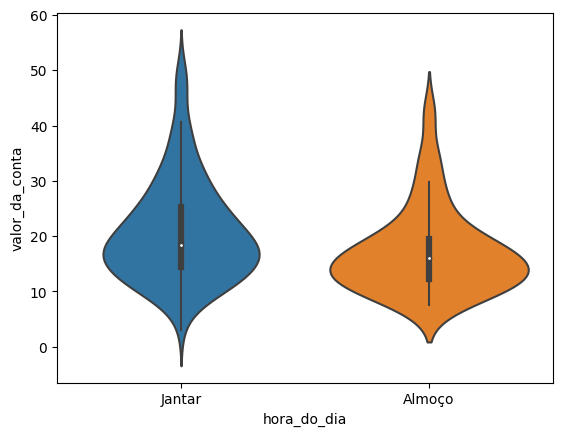

In [75]:
# Criar um de gráficos de violino, relacionando o valor da conta com a hora do dia.
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

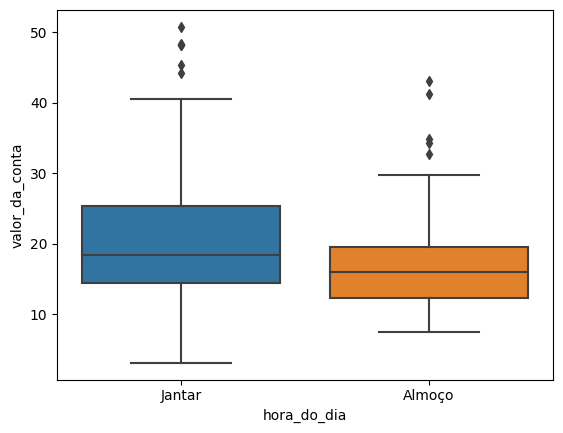

In [76]:
# Cria um gráfico box plot, com informações deposição, dispersão, assimetria, discrepâncias e etc.
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [82]:
# Faz um recorte do dataset, selecionando apenas os registros da hora do almoço.
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
almoco

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_da_conta, Length: 68, dtype: float64

<Axes: xlabel='valor_da_conta', ylabel='Count'>

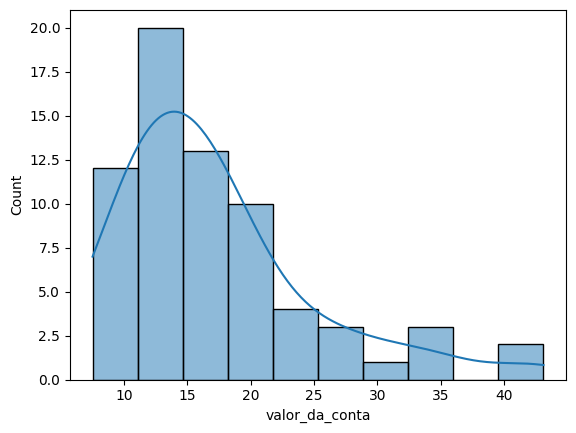

In [85]:
# Cria um gráfico de histograma, com a frequência do valor da conta na hora do almoço.
sns.histplot(almoco, kde= True)

In [86]:
# Faz um recorte do dataset, selecionando apenas os registros da hora do jantar.
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
jantar

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: valor_da_conta, Length: 176, dtype: float64

<Axes: xlabel='valor_da_conta', ylabel='Count'>

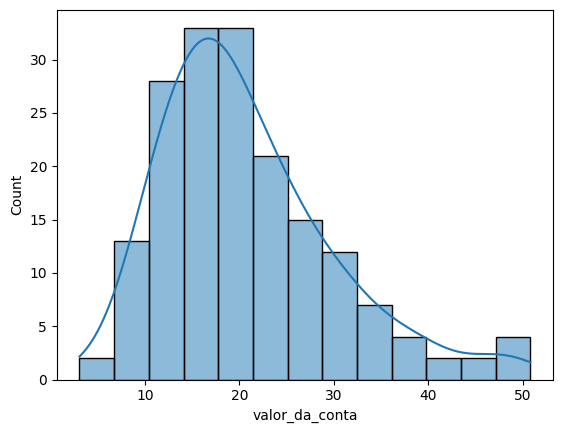

In [87]:
# Cria um gráfico de histograma, com a frequência do valor da conta na hora do jantar.
sns.histplot(jantar, kde= True)

In [89]:
# Calcula a média das variáveis/colunas, por dia da semana.
gorjetas.groupby(['hora_do_dia']).mean()

<ipython-input-89-b1079b182bcc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.168676,2.728088,2.411765,0.163971
Jantar,20.797159,3.102670,2.630682,0.159773


In [88]:
# Calcula a média das variáveis/colunas, por hora do dia, mas especificando as colunas a ser consideradas.
# Exclui a média de pessoas, pois como não existem 2,41 pessoas, não faz sentido exibir esse tipo de dado.
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

<ipython-input-88-f114a0c0b279>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese 1

**H<sup>null</sup>** ou **H<sup>0</sup>**=
A distribuição do valor da conta é igual na hora do almoço e da janta.

**H<sup>alt</sup>** ou **H<sup>1</sup>**=
A distribuição do valor da conta não é igual na hora do almoço e da janta.

In [91]:
# Calcula a estatística de teste e p-valor, para verificar se os dois grupos são iguais ou diferentes.
r2 = ranksums(jantar, almoco)
# Formata uma frase para selecionar e exibir o apenas o p-valor.
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 0.0011791039723641672


## Conclusão

Podemos aceitar hipótese alternativa, pois o p-valor é menor do que 0.05. Isso significa que a distribuição do valor da conta não é igual no almoço e na janta.

## Teste de hipótese 2

**H<sup>null</sup>** ou **H<sup>0</sup>**=
A distribuição da taxa da gorjeta é igual na hora do almoço e da janta.

**H<sup>alt</sup>** ou **H<sup>1</sup>**=
A distribuição da taxa da gorjeta não é igual na hora do almoço e da janta.

In [94]:
# Faz um recorte do dataset, selecionando apenas o percentual dos registros da hora do almoço.
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_almoco

77     0.15
78     0.13
79     0.16
80     0.15
81     0.20
       ... 
222    0.22
223    0.19
224    0.12
225    0.15
226    0.20
Name: porcentagem, Length: 68, dtype: float64

In [95]:
# Faz um recorte do dataset, selecionando apenas o percentual dos registros da hora do jantar.
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
porcentagem_jantar

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
239    0.20
240    0.07
241    0.09
242    0.10
243    0.16
Name: porcentagem, Length: 176, dtype: float64

In [97]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126


## Conclusão

Para aceitaremos a hipótese alternativa o p-valor teria que ser menor do que 0.05, como é maior, apenas nossa hipótese nula é válida. Isso significa que a distribuição do valor taxa de gosrjeta é igual no almoco e jantar.